# IRIS Flower Classification 

# Dataset Information 

The Data set contains 3 classes of 50 instances each, where each class refers to  a  type of iris plant . one class is linearly separable from the other 2, the latter are NOT
linearly separable from each other .

Attribute Information

 1.Sepal length in cm,2.sepal width in cm,3.petal length in cm,4.petal width in cm,5.class-iris Setosa-iris Veriscolor-iris Virginica 


# Importing libraries 

In [1]:
import pandas as pd 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# The Data

Let's start by reading in the iris data.csv file into a pandas dataframe.

In [2]:
# importing csv file 

df = pd.read_csv("iris data.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

# Missing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
# to display no. of samples on each class

df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
# check for null values

pd.isnull(df).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Data Preprocessing 

In [11]:
df.duplicated().any()

True

In [12]:
# drop the duplicate values 

df = df.drop_duplicates()

In [13]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
# machine learning algorithm does not able to undersatnd the strings that's why we convert into int. 

from sklearn.preprocessing import LabelEncoder 

In [16]:
species = LabelEncoder()
df['species']=species.fit_transform(df['species'])

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [19]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


# Exploratory Data Analysis 

# Histogram

<Axes: >

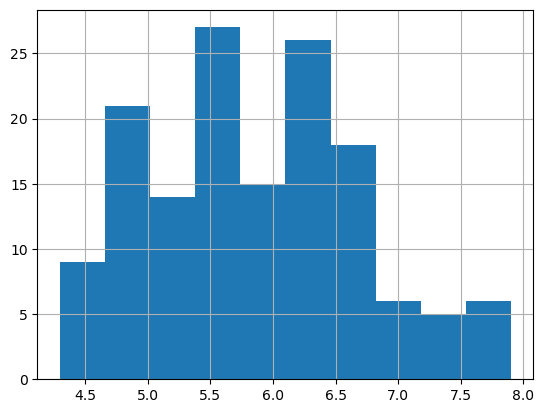

In [20]:
# plotting a histogram for sepal_length.
df['sepal_length'].hist()

<Axes: ylabel='Frequency'>

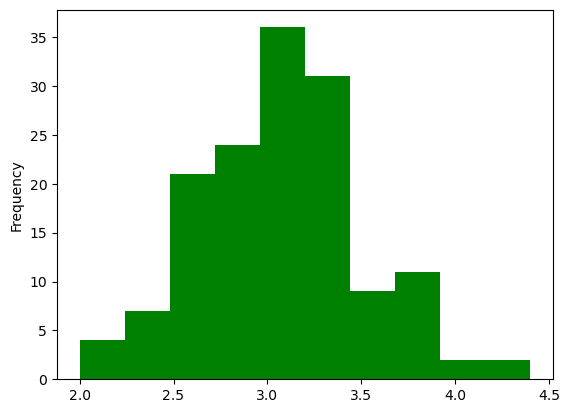

In [21]:
# plotting a histogram for sepal_width

df['sepal_width'].plot.hist(color="green")

<Axes: ylabel='Frequency'>

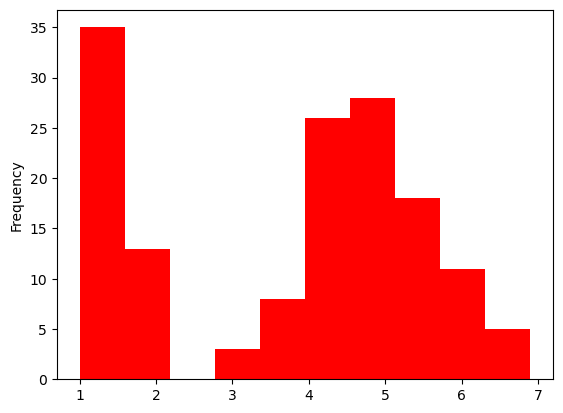

In [22]:
# plotting a histogram for petal_length

df['petal_length'].plot.hist(color="red")

<Axes: ylabel='Frequency'>

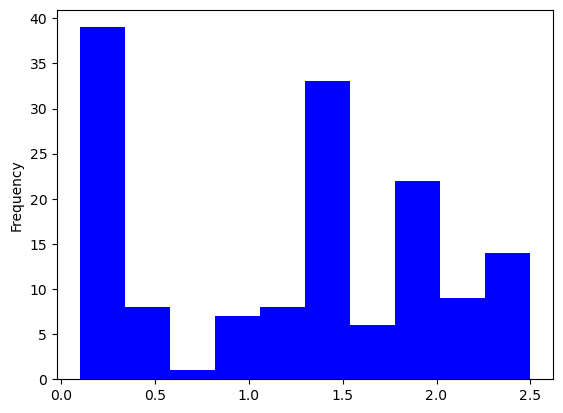

In [23]:
# plotting a histogram for petal_width

df['petal_width'].plot.hist(color="blue")

# Countplot 

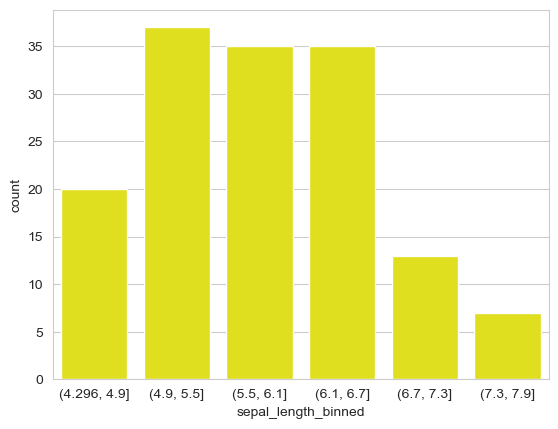

In [24]:
# plotting a countplot for sepal_length.

import matplotlib.pyplot as plt
sns.set_style('whitegrid')
bins = pd.cut(df['sepal_length'],bins=6) #create 6  bins
df['sepal_length_binned'] = bins
sns.countplot(x="sepal_length_binned",data=df,color= "yellow")
plt.show()

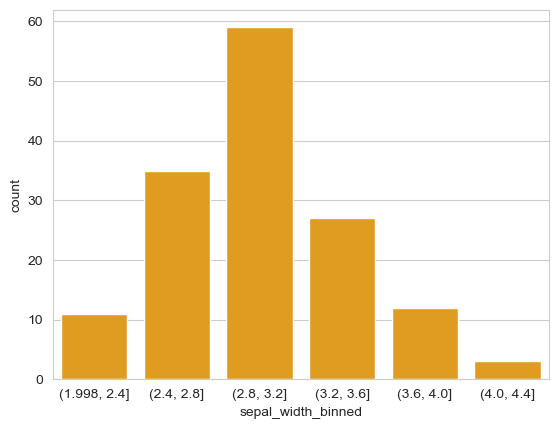

In [25]:
# plotting a countplot for sepal_width.

import matplotlib.pyplot as plt
sns.set_style('whitegrid')
bins = pd.cut(df['sepal_width'],bins=6) #create 6  bins
df['sepal_width_binned'] = bins
sns.countplot(x="sepal_width_binned",data=df,color= "orange")
plt.show()

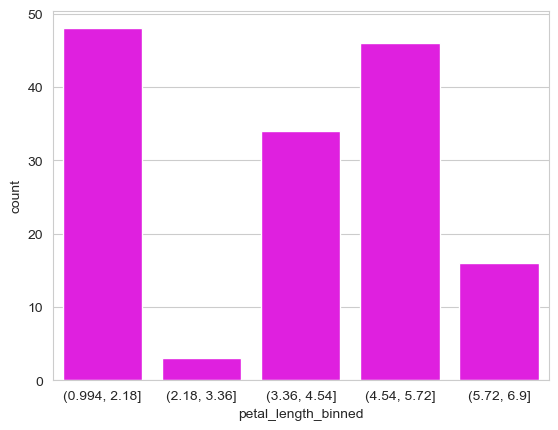

In [26]:
# plotting a countplot for petal_length.

import matplotlib.pyplot as plt
sns.set_style('whitegrid')
bins = pd.cut(df['petal_length'],bins=5) #create 5  bins
df['petal_length_binned'] = bins
sns.countplot(x="petal_length_binned",data=df,color= "Magenta")
plt.show()

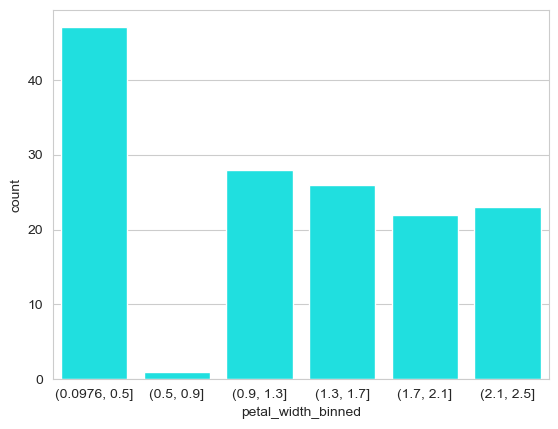

In [27]:
# plotting a countplot for petal_width.

import matplotlib.pyplot as plt
sns.set_style('whitegrid')
bins = pd.cut(df['petal_width'],bins=6) #create 6  bins
df['petal_width_binned'] = bins
sns.countplot(x="petal_width_binned",data=df,color= "Cyan")
plt.show()

# Barplot 

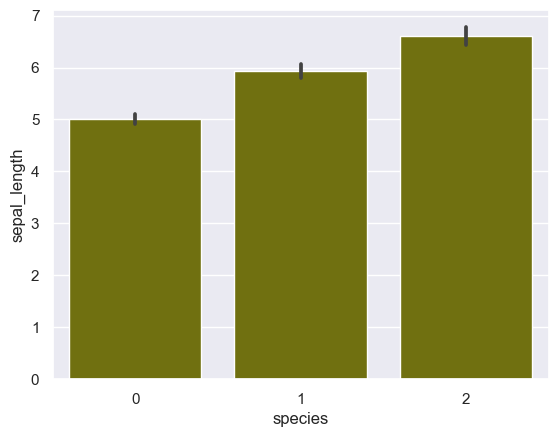

In [28]:
# plotting a barplot for species vs sepal_length

sns.set(style="darkgrid")
sns.barplot(x="species",y="sepal_length",data=df,orient="v",color="Olive")
plt.show()

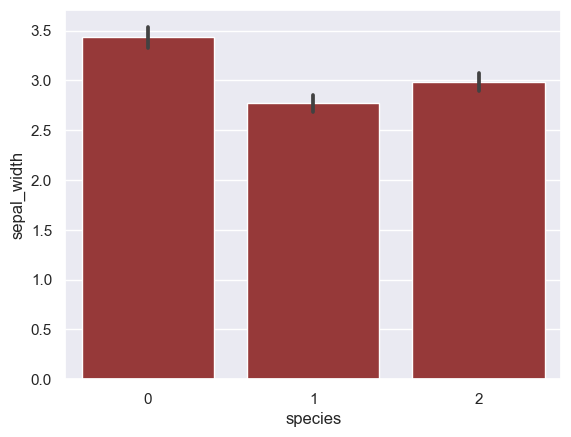

In [29]:
# plotting a barplot for species vs sepal_width.

sns.set(style="darkgrid")
sns.barplot(x="species",y="sepal_width",data=df,orient="v",color="brown")
plt.show()

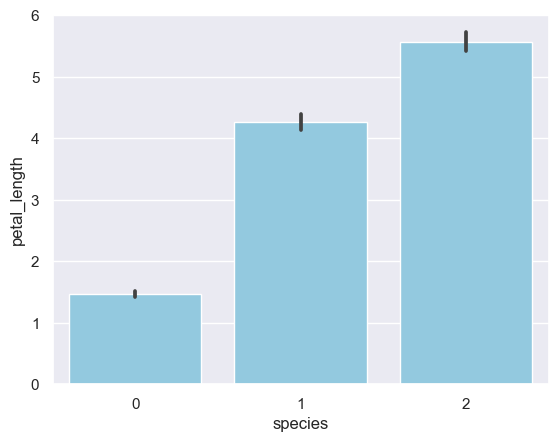

In [30]:
# plotting a barplot for species vs petal_length

sns.set(style="darkgrid")
sns.barplot(x="species",y="petal_length",data=df,orient="v",color="skyblue")
plt.show()

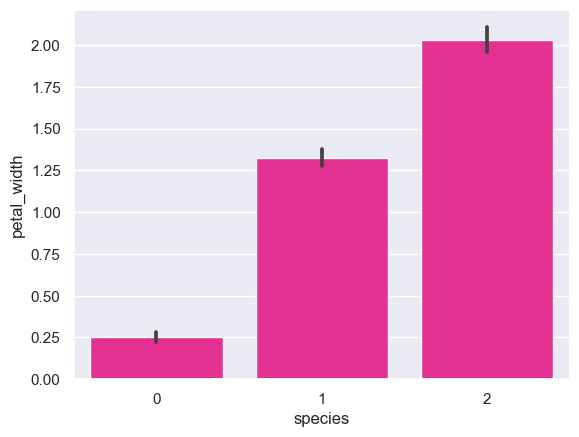

In [31]:
# plotting a barplot for species vs petal_width

sns.set(style="darkgrid")
sns.barplot(x="species",y="petal_width",data=df,orient="v",color="deeppink")
plt.show()

# Boxplot 

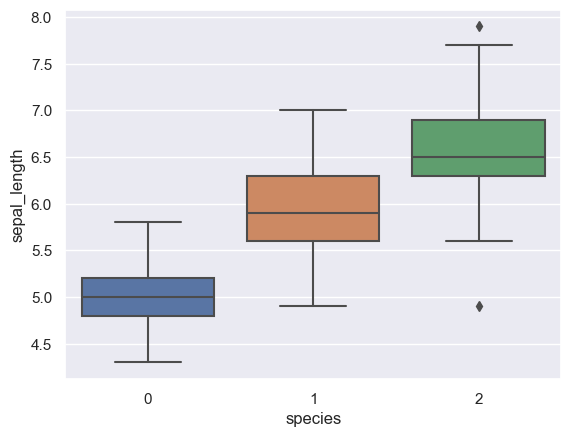

In [32]:
# plotting a boxplot for species vs sepal_length.
sns.boxplot(x='species' , y='sepal_length' ,data=df)
plt.show()

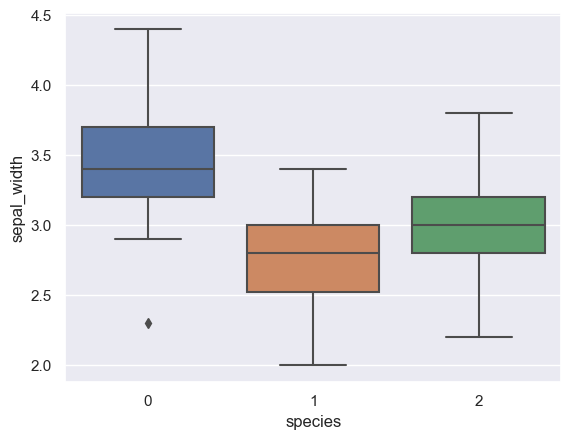

In [33]:
# plotting a boxplot for species vs sepal_width
sns.boxplot(x='species' , y='sepal_width' ,data=df)
plt.show()

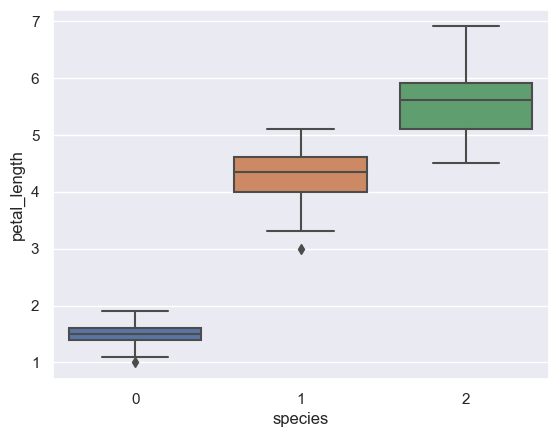

In [34]:
# plotting a boxplot for species vs petal_length
sns.boxplot(x='species' , y='petal_length' ,data=df)
plt.show()

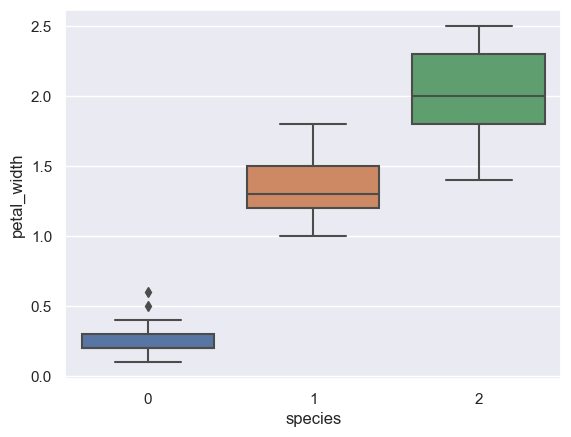

In [35]:
# plotting a boxplot for species vs petal_width
sns.boxplot(x='species' , y='petal_width' ,data=df)
plt.show()

# Heatmap

<Axes: >

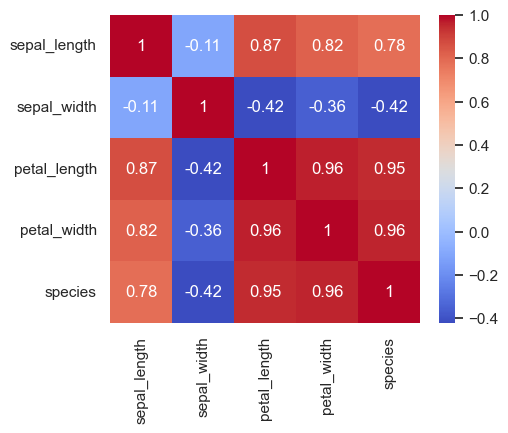

In [36]:
# plotting a heatmap

corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Pairplot

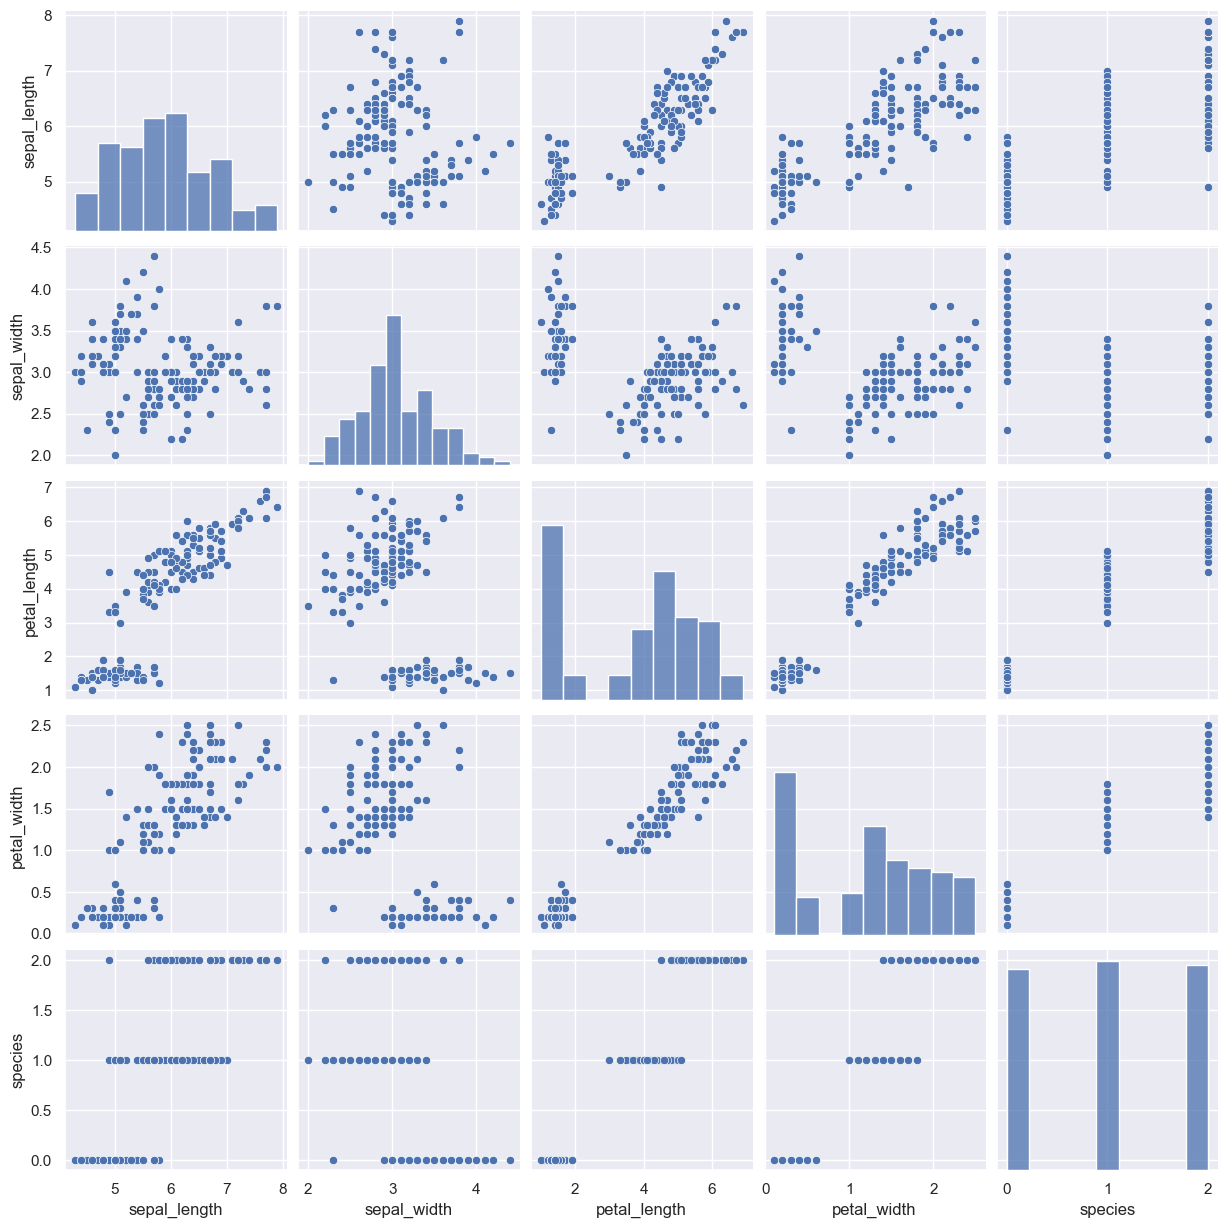

In [66]:
# plotting the pairplot
sns.pairplot(df)
plt.show()

# Train and Test Split

In [38]:
inputs=["sepal_length","sepal_width","petal_length","petal_width"]
x=df[inputs]
y=df.species

In [39]:
# split the datasets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((117, 4), (30, 4), (117,), (30,))

In [41]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
30,4.8,3.1,1.6,0.2
114,5.8,2.8,5.1,2.4
20,5.4,3.4,1.7,0.2
21,5.1,3.7,1.5,0.4
24,4.8,3.4,1.9,0.2
...,...,...,...,...
31,5.4,3.4,1.5,0.4
70,5.9,3.2,4.8,1.8
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4


In [42]:
y_train

30     0
114    2
20     0
21     0
24     0
      ..
31     0
70     1
106    2
76     1
129    2
Name: species, Length: 117, dtype: int32

# Model Training

# Decision Tree Classifier

In [43]:
# Using ldecision tree classifier  for predicting the model

from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini')

In [44]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

# scores

In [45]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [46]:
# score of train data 

x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)                 

In [47]:
training_data_precision = precision_score(x_train_prediction, y_train,average='macro')
training_data_f1 = f1_score(x_train_prediction, y_train,average='macro')
training_data_recall = recall_score(x_train_prediction, y_train,average='macro')

In [48]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [49]:
print('precision on Training data : ', training_data_precision)
print('recall on training data : ', training_data_recall)
print('f1 on Training data : ', training_data_f1)

precision on Training data :  1.0
recall on training data :  1.0
f1 on Training data :  1.0


In [50]:
# score of test data 

x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)                 

In [51]:
test_data_precision = precision_score(x_test_prediction, y_test,average='macro')
test_data_f1 = f1_score(x_test_prediction, y_test,average='macro')
test_data_recall = recall_score(x_test_prediction, y_test,average='macro')

In [52]:
print('Accuracy on Test data : ', test_data_accuracy)
print('precision on Test data : ', test_data_precision)
print('recall on Test data : ', test_data_recall)
print('f1 on Test data : ', test_data_f1)

Accuracy on Test data :  0.9
precision on Test data :  0.9220779220779222
recall on Test data :  0.9188034188034188
f1 on Test data :  0.9194847020933977


# Apply joblib

In [53]:
# using joblib for saving the model

import joblib

In [55]:
joblib.dump(classifier,"classifier_joblib")

['classifier_joblib']

In [56]:
classifier = joblib.load('classifier_joblib')

In [58]:
classifier.predict([[6.7,3.0,5.2,2.3]])

array([2])

In [59]:
classifier.predict(x_train)

array([0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1,
       1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0,
       1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 2, 1, 2])

In [60]:
classifier.score(x_train,y_train)

1.0

In [61]:
from sklearn import tree

[Text(0.4444444444444444, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.665\nsamples = 117\nvalue = [43, 36, 38]'),
 Text(0.3333333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 36, 38]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.184\nsamples = 39\nvalue = [0, 35, 4]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= 4.95\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.25\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[3] <= 1.25\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsample

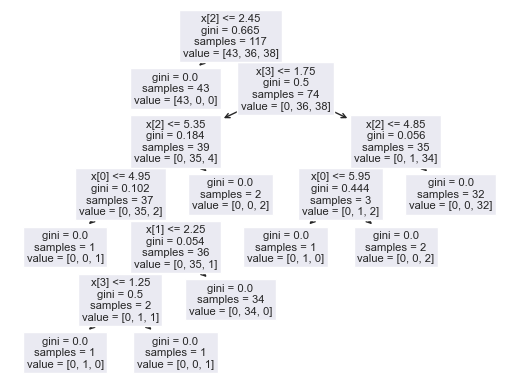

In [62]:
tree.plot_tree(classifier)

# Conclusion

I successfully developed a machine learning model that can classify Iris flowers into their respective species (Setosa, Versicolor, and Virginica) based on their sepal and petal measurements.

After training the model using the Iris dataset, you evaluated its performance using metrics such as accuracy, precision, recall, and F1 score. The model's performance was likely satisfactory, given the simplicity and well-structured nature of the dataset.

The analysis may have shown that certain features (such as petal length and petal width) are more significant in distinguishing between the species compared to others (like sepal length and sepal width).

i visualized the data and the classification results, providing clear insights into how the different species are distributed in the feature space. These visualizations helped in understanding the decision boundaries created by the model.

The model i developed should generalize well to new, unseen data from the same distribution. However, you might also mention that, while this project demonstrates the process of building a simple classification model, real-world applications would require more complex models, cross-validation, and potentially larger datasets to handle more varied and noisy data.

The project served as an excellent introduction to classification tasks using machine learning, covering the entire pipeline from data exploration, preprocessing, model training, evaluation, and interpretation.